In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('bmh')

Read all available sensor data into a dict

In [3]:
sensors = {}
sensors[1] = pd.read_csv('../data/processed/sensors/1-processed.csv')
sensors[2] = pd.read_csv('../data/processed/sensors/2-processed.csv')
sensors[3] = pd.read_csv('../data/processed/sensors/3-processed.csv')
sensors[4] = pd.read_csv('../data/processed/sensors/4-processed.csv')


for sensor_id in sensors:
   sensors[sensor_id]  = sensors[sensor_id].set_index('date_timestamp')

Add rolling averages for trend analysis

In [4]:
rolling_window_size = 60

for sensor_id in sensors:
    sensors[sensor_id]['sound_rolling'] = sensors[sensor_id]['sound'].rolling(rolling_window_size,min_periods=5, center=True).mean()
    sensors[sensor_id]['light_rolling'] = sensors[sensor_id]['light'].rolling(rolling_window_size,min_periods=5, center=True).mean()

In [5]:
def create_date_place_grid(sensors, parameter1, parameter2):
    all_dates = sorted(set.union(*[set(sensors[sensor_id]['date'].unique()) for sensor_id in sensors]))
    n_rows = len(all_dates)
    n_cols = len(sensors)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), sharex=True, sharey=True)

    for col_idx, sensor_id in enumerate(sensors):
        for row_idx, date in enumerate(all_dates):
            ax = axes[row_idx, col_idx]
            group = sensors[sensor_id].loc[sensors[sensor_id]['date'] == date]
            if not group.empty:
                group.plot(x='time', y=[parameter1,parameter2], ax=ax)
            ax.set_title(f'Sensor {sensor_id}, Date: {date}')

    plt.tight_layout()
    plt.show() 

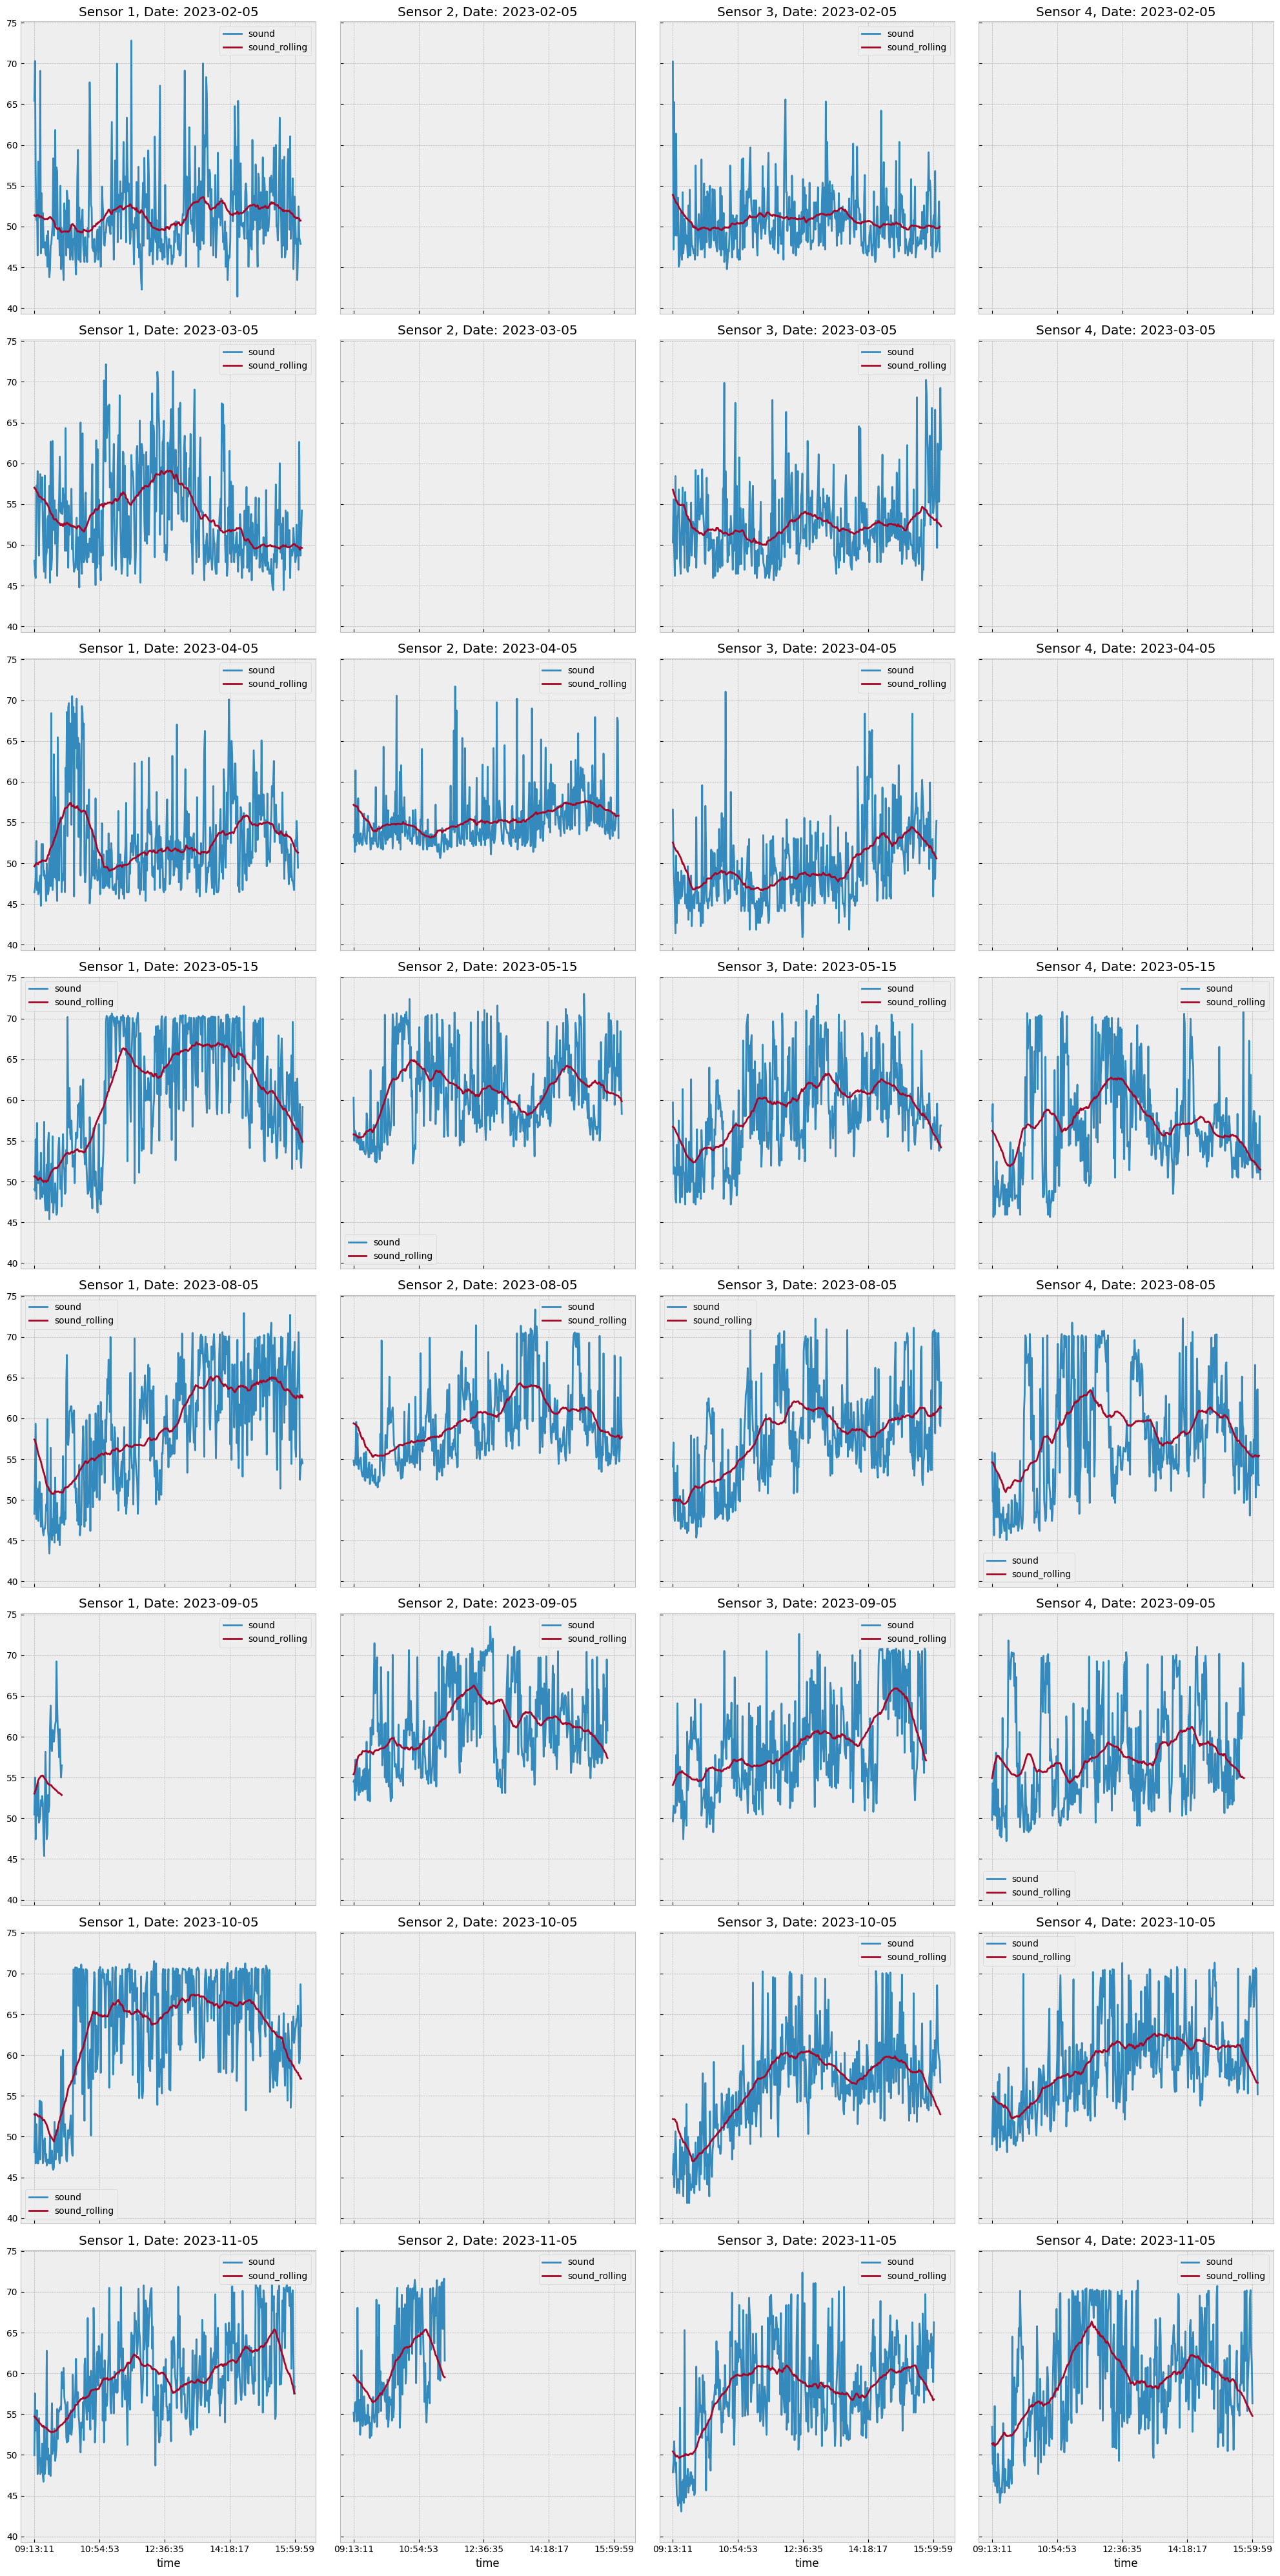

In [6]:
create_date_place_grid(sensors, 'sound', 'sound_rolling')

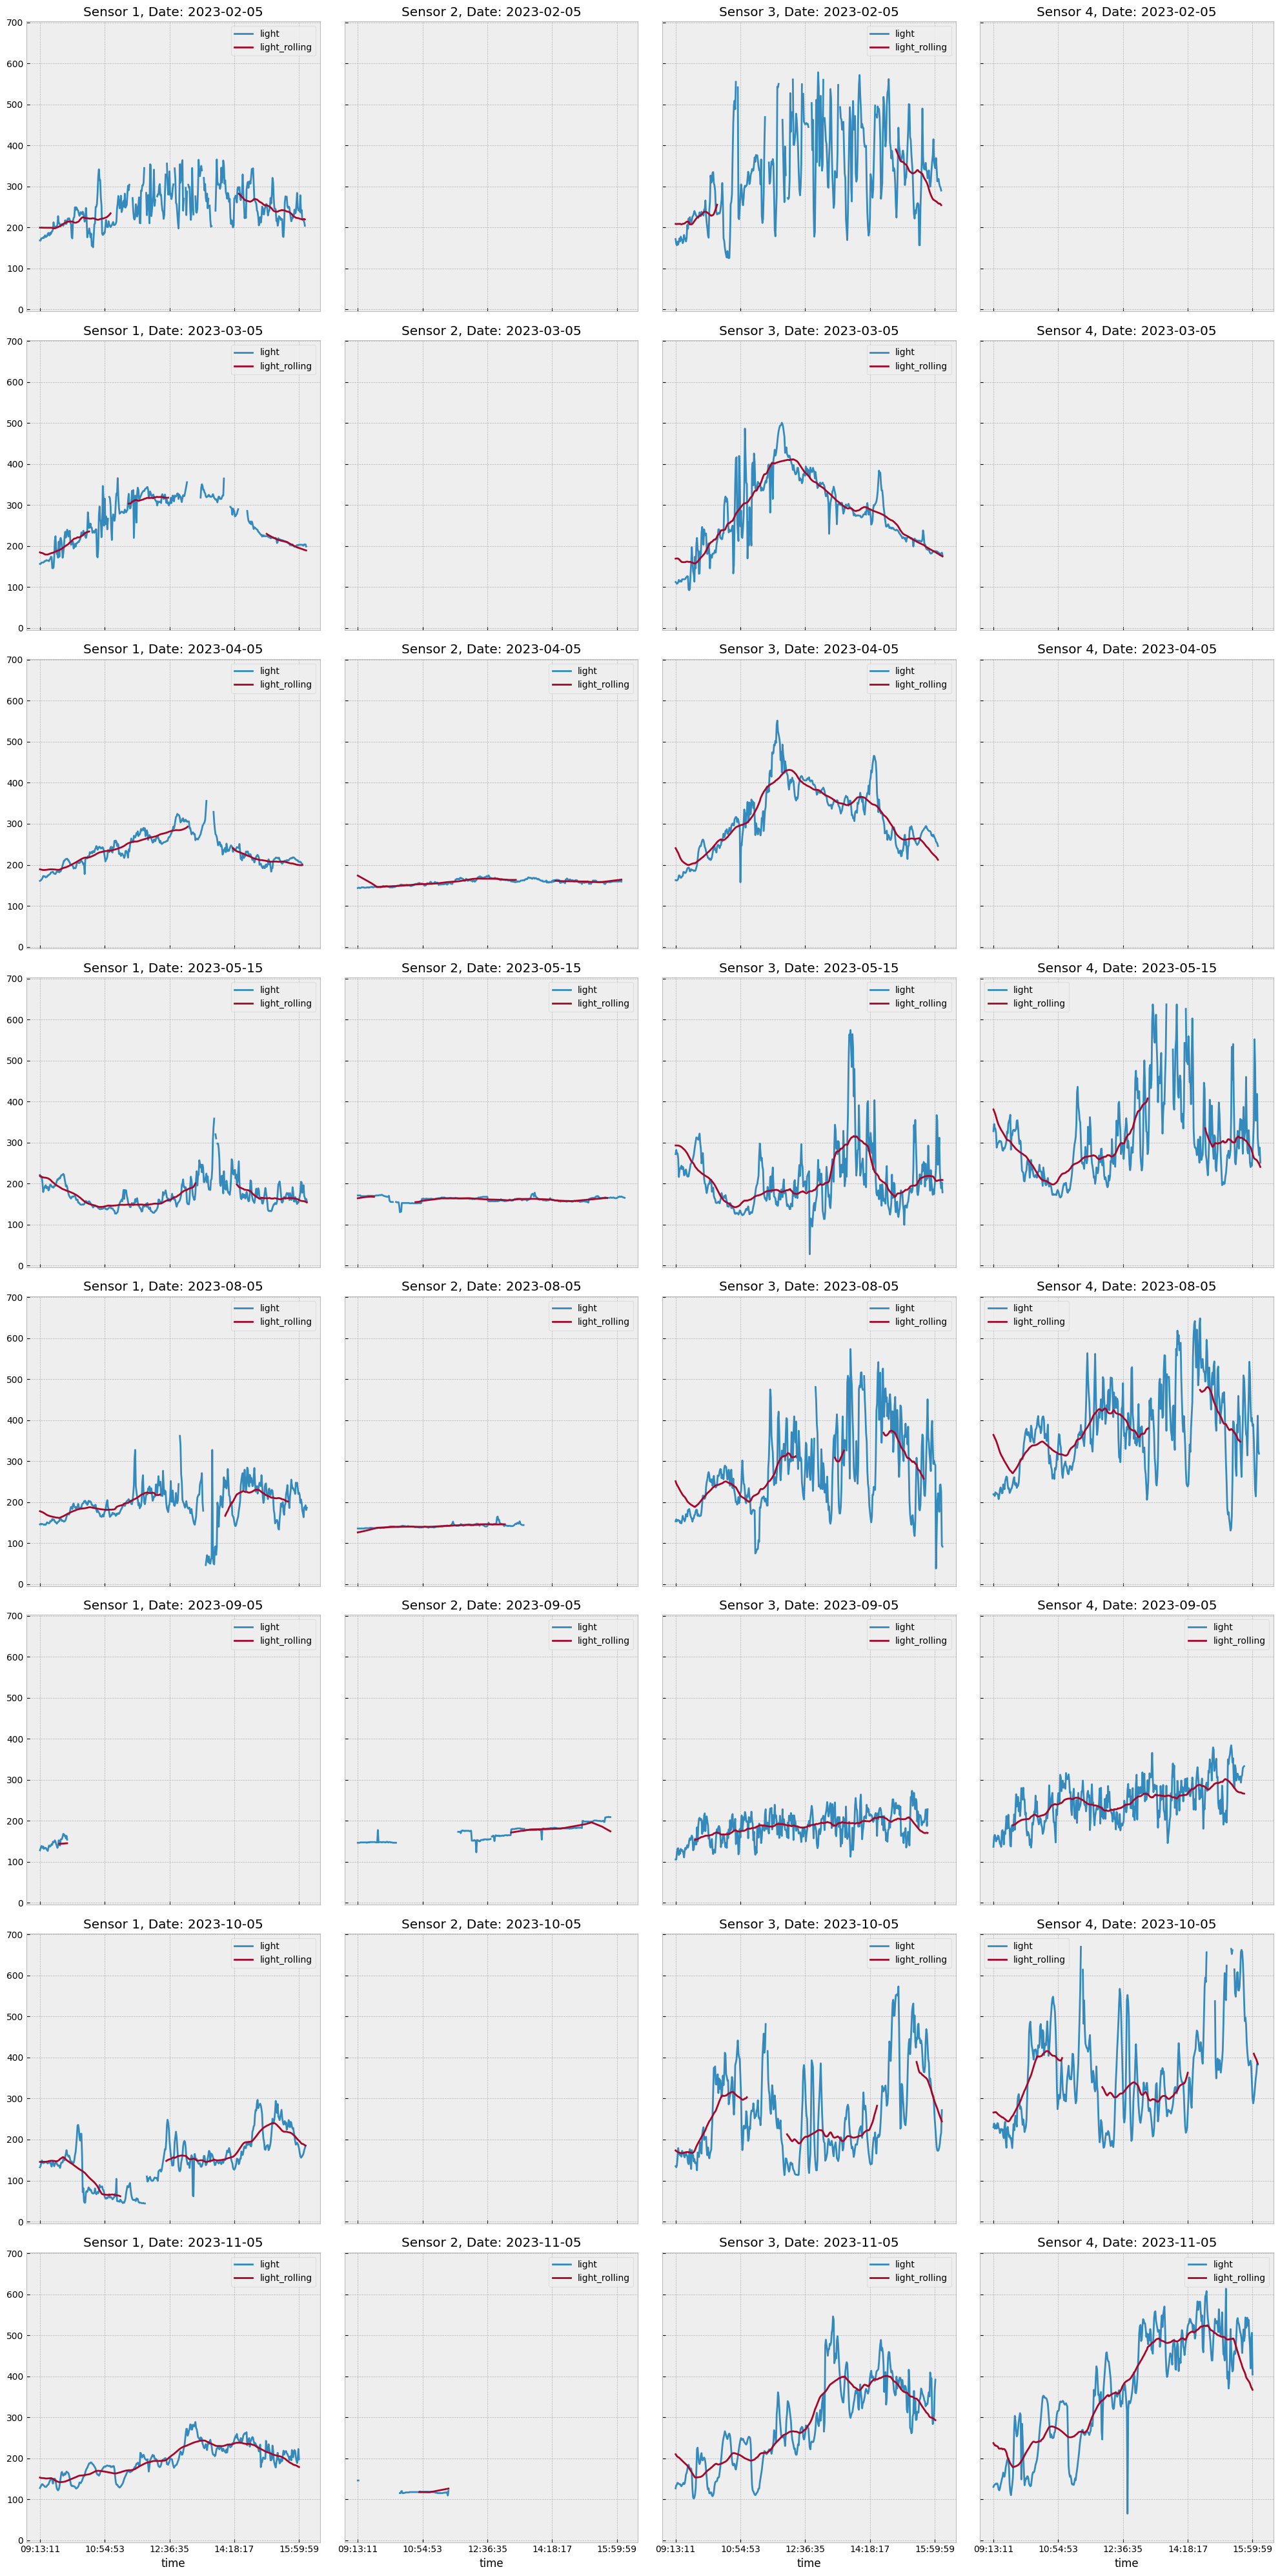

In [21]:
create_date_place_grid(sensors, 'light', 'light_rolling')